<h1> Prediction Using Unsupervised ML </h1>
    <b> By N Prem Sai Sameer </b> <BR>
 TASK 2 - From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually. 

In [1]:
# Importing libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
# The following command imports the CSV dataset using pandas:
iris_df = pd.read_csv("/home/prem/PycharmProjects/GRIP_Internships/task2/Iris.csv")

iris_df = iris_df.drop("Id",axis = 1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Check null values 
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
X = iris_df.drop("Species",axis = 1)
y = iris_df["Species"]

In [5]:
# statistics of the data
pd.DataFrame(X).describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<b> We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result: </b>

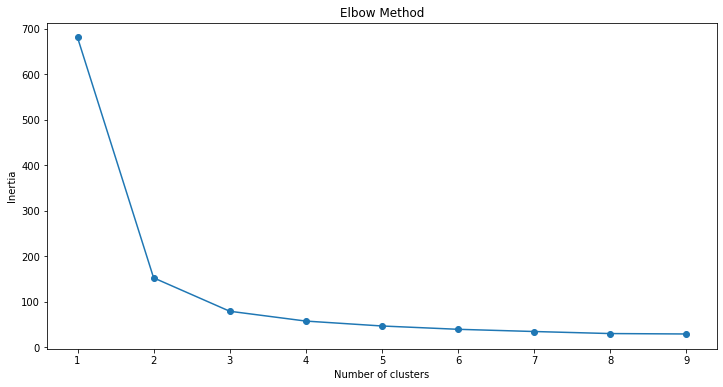

In [6]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

<b> Looking at the above elbow curve, we can choose any number of clusters between 3 to 5.<br><br> Let’s set the number of clusters as 3 and fit the model: </b>

In [7]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(X)
pred = kmeans.predict(X)

In [8]:
#Finally, let’s look at the value count of points in each of the above-formed clusters:

frame = pd.DataFrame(iris_df)
frame["cluster"] = pred
print(frame['cluster'].value_counts())
frame

0    62
1    50
2    38
Name: cluster, dtype: int64


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


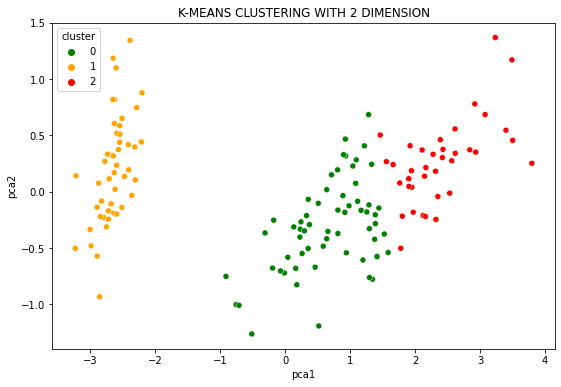

In [9]:
# Visualizing the Clusters

from sklearn.decomposition import PCA

REDUCED_DATA = PCA(n_components=2).fit_transform(frame.drop(["Species","cluster"],axis=1))
FINAL = pd.DataFrame(REDUCED_DATA,columns=['pca1','pca2'])

# PLOTTING OF CLUSTERS

plt.figure(figsize=(9,6))
sns.scatterplot(x="pca1", y="pca2", hue=frame['cluster'],palette=['green','orange','red'] ,data=FINAL)
plt.title('K-MEANS CLUSTERING WITH 2 DIMENSION')
plt.show()